#  Regresión Logística y análisis del dataset con R

Dependencias extra (para visualización de homocedasticidad): 

    install.packages("car")


In [1]:
library(car)

Warning message:
“package ‘car’ was built under R version 3.4.4”Loading required package: carData
Warning message:
“package ‘carData’ was built under R version 3.4.4”

In [2]:
# Nota: Se cambia el comment char por que el dataset usa '#' para sostenidos (y es el default)
data <- read.table("Rsnd-dataset.csv", header=TRUE, sep=",", comment.char = "$")
head(data)

Duration,Loudness,LogAttackTime,Tempo,Tempo.confidence,TemporalCentroid,Pitch,Pitch.confidence,Key,Key.confidence,Loop
24.688000,-9.428771,0.6439559,122,0.1503259,0.5547289,150.4759,0,A minor,0.6709849,False
9.743673,-15.724195,-1.5389284,99,0.9529320,0.5155233,172.6503,0,A# major,0.5451180,True
2.965000,-41.118546,-0.1084486,98,0.0000000,0.4362094,1856.8141,0,C# minor,0.3593464,False
212.834106,-13.990514,1.0793937,94,0.6615902,0.4719108,233.8543,0,B major,0.8786752,False
1.985306,-12.687588,-0.7070712,125,0.0000000,0.5171711,269.7562,0,C major,0.7367954,False
301.766541,-21.907431,1.3797597,137,0.1403883,0.4675272,125.7738,0,B minor,0.8294241,False


In [3]:
# Se eliminan columnas de 'confianza'
data$Tempo.confidence <- NULL
data$Pitch.confidence <- NULL
data$Key.confidence <- NULL

In [4]:
data$Key <-NULL

In [5]:
head(data)

Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Loop
24.688000,-9.428771,0.6439559,122,0.5547289,150.4759,False
9.743673,-15.724195,-1.5389284,99,0.5155233,172.6503,True
2.965000,-41.118546,-0.1084486,98,0.4362094,1856.8141,False
212.834106,-13.990514,1.0793937,94,0.4719108,233.8543,False
1.985306,-12.687588,-0.7070712,125,0.5171711,269.7562,False
301.766541,-21.907431,1.3797597,137,0.4675272,125.7738,False


# Se pasa la columna 'Loop' a variable dummy (entera binaria)

Se convierten las dos categorias (True y False) en 0 y 1, de la variable dummy.

In [6]:
x = data$Loop
x <- as.factor(x)
levels(x) <- 0:length(levels(x))
x <- as.numeric(x) - 1
data$Loop <- x
head(data)

Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Loop
24.688000,-9.428771,0.6439559,122,0.5547289,150.4759,0
9.743673,-15.724195,-1.5389284,99,0.5155233,172.6503,1
2.965000,-41.118546,-0.1084486,98,0.4362094,1856.8141,0
212.834106,-13.990514,1.0793937,94,0.4719108,233.8543,0
1.985306,-12.687588,-0.7070712,125,0.5171711,269.7562,0
301.766541,-21.907431,1.3797597,137,0.4675272,125.7738,0


## Observo si existe correlación entre los datos

Observo la correlación lineales entre las variables (verificación de supuestos). Más adelante se analiza la homocedasticidad.

In [7]:
# Observo correlación
cor(data)

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Loop
Duration,1.00000000,0.12518683,0.52035585,0.096701320,0.229799320,-0.133887898,-0.26327766
Loudness,0.12518683,1.00000000,0.12056565,0.055650106,0.024329745,-0.184486171,-0.08182581
LogAttackTime,0.52035585,0.12056565,1.00000000,0.068164938,0.352513654,-0.149583214,-0.25397552
Tempo,0.09670132,0.05565011,0.06816494,1.000000000,0.044982315,0.006298263,-0.18693271
TemporalCentroid,0.22979932,0.02432975,0.35251365,0.044982315,1.000000000,-0.008669846,-0.07204478
Pitch,-0.13388790,-0.18448617,-0.14958321,0.006298263,-0.008669846,1.000000000,0.16216354
Loop,-0.26327766,-0.08182581,-0.25397552,-0.186932709,-0.072044775,0.162163536,1.00000000


** Se buscan valores mayores a 0.5, pareciera que la duración esta correlacionada con el LogAttackTime y nada más. Igual parece muy poco.**

## Cálculo de la regresión logística

Se intenta estimar la duracion a partir del LogAttackTime y el TemporalCentroid

    Duration = LogAttackTime + TemporalCentroid

In [8]:
reg1 <- lm( Duration ~ LogAttackTime + TemporalCentroid, data )
reg1


Call:
lm(formula = Duration ~ LogAttackTime + TemporalCentroid, data = data)

Coefficients:
     (Intercept)     LogAttackTime  TemporalCentroid  
           32.65             72.35            119.49  


In [9]:
summary(reg1)


Call:
lm(formula = Duration ~ LogAttackTime + TemporalCentroid, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-171.81  -88.85  -21.91   48.02 1233.82 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        32.648     24.231   1.347   0.1780    
LogAttackTime      72.350      3.179  22.760   <2e-16 ***
TemporalCentroid  119.485     49.745   2.402   0.0164 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 134.4 on 1708 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2724 
F-statistic: 321.1 on 2 and 1708 DF,  p-value: < 2.2e-16


**Observación: Valor de R cuadrado muy bajo!**

## Homocedasticidad

Se grafica para observar la homocedasticidad.

           Test stat Pr(>|Test stat|)    
Tukey test    17.799        < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


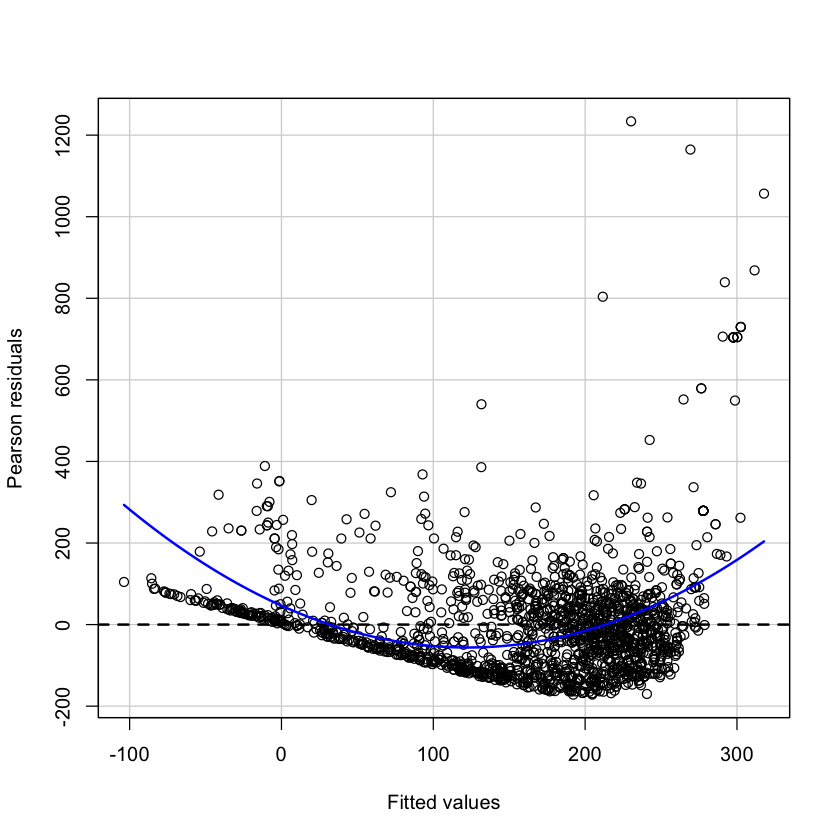

In [10]:
residualPlots(reg1, ~ 1, fitted=TRUE)

**Observación: La variabilidad de 'y' NO parece independiente de 'x', se concetran muchos más valores sobre 200. No es buen indicio. Los errores no tienen una varianza constante.**

## Predicciones

In [21]:
# Datos de entrada:
nuevos <- data.frame("LogAttackTime" = c(0.34,0.47,1.2  ,1.13,0.8), "TemporalCentroid" = c(0.52,0.4 ,0.59 ,0.43, 0.45))
nuevos

LogAttackTime,TemporalCentroid
0.34,0.52
0.47,0.40
1.20,0.59
1.13,0.43
0.80,0.45


In [22]:
# Duration = LogAttackTime + TemporalCentroid
predict.lm(object=reg1, newdata=nuevos)

1        2        3        4        5 
119.3792 114.4465 189.9645 165.7823 144.2964

**Duraciones predichas según el modelo en segundos**

## Considerando el efecto interactivo

Se agrega una columna considerando la variable cuantitativa centrada (valor menos la media).

In [14]:
data$x1 <- data$LogAttackTime - mean(data$LogAttackTime)

En otra columna se coloca el producto de la variable cuantitativa centrada por la cualitativa dummy.

In [17]:
data$x1X2 <- data$x1*data$TemporalCentroid

In [18]:
head(data)

Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Pitch,Loop,x1,x1X2
24.688000,-9.428771,0.6439559,122,0.5547289,150.4759,0,-0.2994514,-0.16611435
9.743673,-15.724195,-1.5389284,99,0.5155233,172.6503,1,-2.4823358,-1.27970196
2.965000,-41.118546,-0.1084486,98,0.4362094,1856.8141,0,-1.0518560,-0.45882945
212.834106,-13.990514,1.0793937,94,0.4719108,233.8543,0,0.1359864,0.06417345
1.985306,-12.687588,-0.7070712,125,0.5171711,269.7562,0,-1.6504785,-0.85357978
301.766541,-21.907431,1.3797597,137,0.4675272,125.7738,0,0.4363523,0.20400659


## Regresión con efecto interactivo:

In [19]:
reg2 <- lm( Duration ~ LogAttackTime + TemporalCentroid + x1X2, data )
reg2


Call:
lm(formula = Duration ~ LogAttackTime + TemporalCentroid + x1X2, 
    data = data)

Coefficients:
     (Intercept)     LogAttackTime  TemporalCentroid              x1X2  
           24.45            -50.25            353.74            245.28  


In [20]:
summary(reg2)


Call:
lm(formula = Duration ~ LogAttackTime + TemporalCentroid + x1X2, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-235.00  -85.33  -20.08   48.33 1205.42 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         24.45      23.88   1.024  0.30620    
LogAttackTime      -50.25      16.84  -2.984  0.00289 ** 
TemporalCentroid   353.74      58.30   6.068 1.59e-09 ***
x1X2               245.28      33.11   7.408 2.00e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 132.3 on 1707 degrees of freedom
Multiple R-squared:  0.2959,	Adjusted R-squared:  0.2946 
F-statistic: 239.1 on 3 and 1707 DF,  p-value: < 2.2e-16


**Observación: El R cuadrado sigue siendo muy bajo, por lo cual no se confia en los resultados**

### Nuevas predicciones (con efecto interactivo)

In [25]:
x1 <- nuevos$LogAttackTime - mean(data$LogAttackTime)
nuevos$x1X2  <- x1*nuevos$TemporalCentroid

predict.lm(object=reg2, newdata=nuevos)

1         2         3         4         5 
114.34324  95.87618 209.98080 139.44752 127.59752

Predicciones que contemplan como la variable LogAttackTime afecta a la variable de salida Duration dependiendo de la variable TemporalCentroid.

# Conclusión parcial

Los valores de R^2 tan bajos no permiten confiar demasiado en el modelo de predicción generado.

---

**Siguiente:** [2b - Predicción usando variables dicotómicas (regresión)](2b%20-%20Prediccio%CC%81n%20usando%20variables%20dicot%C3%B3micas%20(regresi%C3%B3n).ipynb#Filtrar-solo-los-valores-de-tempo-con-confianza-alta!)
